<img src = 'https://bancariosbh.org.br/manager/resources/uploads/213/350_198_8e66ca00d7dfdfbd00096a7c220be22c.jpg' height="200" width="340">
<p><b><font size = 5 face = 'verdana'> TAREFA AVALIATIVA 3 - CLUSTERIZAÇÃO</font></b></p>

<p><font size = 3 face = 'verdana'>Trabalho apresentado à conclusão do curso de MACHINE LEARNING do curso de Pós-Graduação em Inteligência Artificial, PUC Minas, como requisito parcial de avaliação. </font></b></p>
<p><font size = 3 face = 'verdana'><b>PROFESSOR:</b> CRISTIANO RODRIGUES DE CARVALHO<br> 
<b>ALUNO:</b> OSEMAR DA SILVA XAVIER<br>
<b>MATRÍCULA:</b> 1418586</font></p>
<p><font size = 3 face = 'verdana'>
<hr></hr>

<b>OBJETIVO</b><br>
<li>Uma operadora de seguro de saúde sabe da forte influência do peso, gênero e nível de colesterol no desenvolvimento de doenças cardíacas. O objetivo dessa atividade é identificar perfis de indivíduos com maior risco para sobrepeso e colesterol alto.</li>
<li>Para alcançar este objetivo, iremos utilizar o modelo agrupamento pelo algoritmo das K-Means. Então nosso objetivo se torna encontrar grupos de indivíduos (clusters) e definir os limites entre o grupo saudável e o grupo de risco.</li>
<li>Esta atividade irá precisar da base de dados: Atividade 6 - Saude.xlsx</li>
<li>A base de dados se chama Atividade 6 - saúde.xlsx, e possui os atributos peso, colesterol e gênero. Peso e colesterol são atributos numéricos. Na variável gênero, 1 corresponde ao sexo masculino e 0 ao feminino.</li>
</p></font>
<p><font size = 3 face = 'verdana'><b> EXERCÍCIO
</font></b></p>

<p><font size = 3 face = 'verdana'>
<li>Utilizando a K-means, realize a clusterização com k=2. Tente descrever os dois grupos gerados. Utilize as informações dos clusteres para tentar diferenciar os dois grupos de risco.</li>
<li>Vamos tentar encontrar 4 grupos distintos: alto risco possui colesterol e peso altos; baixo risco possui colesterol e peso baixos; e risco moderado possui apenas o peso ou apenas o colesterol altos. Verifique os resultados. Investigue quais são os limites de peso e de colesterol para que um indivíduo seja considerado paciente de risco.</li>
</font></b></p>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Abaixo carrego as principais bibliotecas para analisar o dataframe
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
# Abaixo fiz o carregamento dos dados para a variável saude_df
saude_df = pd.read_excel('/content/drive/MyDrive/Python Scripts/Cursos/PUC_Minas/ML/Exercicio Prático III - Clusterização/Atividade 6 - Saude.xlsx')
saude_df.head()

,Peso,Colesterol,Genero
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


In [ ]:
# Descrição dos dados utilizando .info 
saude_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Peso        547 non-null    int64
 1   Colesterol  547 non-null    int64
 2   Genero      547 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB


In [ ]:
# Utilizei a função describe() para calcular um resumo das estatísticas.
saude_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Peso,547.0,143.572212,30.837275,95.0,116.0,140.0,171.0,203.0
Colesterol,547.0,170.433272,39.147189,102.0,136.0,169.0,208.0,235.0
Genero,547.0,0.513711,0.500269,0.0,0.0,1.0,1.0,1.0


In [73]:
# Extrai as colunas e atribuí à variável ​​x.
x = saude_df.iloc[:,0:3] 
x

,Peso,Colesterol,Genero
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1
...,...,...,...
542,172,207,1
543,129,157,1
544,107,115,1
545,117,147,1


In [75]:
# Criei um dataframe para calcular o total por gênero
gender_percent = pd.DataFrame()
gender_percent["Count"] = saude_df.groupby("Genero")["Genero"].count()
gender_percent["Percent"] = gender_percent["Count"] / gender_percent["Count"].sum() * 100
gender_percent["Percent"] = gender_percent["Percent"].astype(int)
female = gender_percent["Percent"].iloc[0]
male = gender_percent["Percent"].iloc[1]

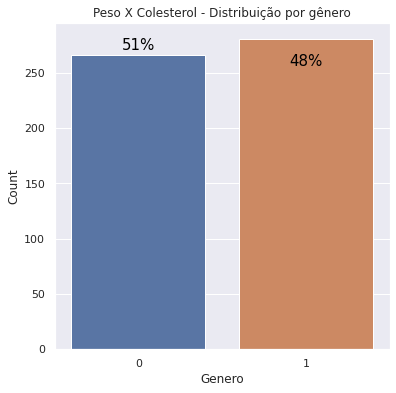

In [82]:
# Abaixo ploto um gráfico com o resultado do total por gênero
plt.figure(figsize = (6, 6))
sns.countplot(data = saude_df, x = "Genero")
plt.annotate(str(female)+"%", xy=(1, gender_percent["Count"].iloc[0]-10), color = 'black', size = 15, ha = 'center')
plt.annotate(str(male)+"%", xy=(0,gender_percent["Count"].iloc[1]-10), color = 'black', size = 15, ha = 'center')
plt.ylabel("Count")
plt.title("Peso X Colesterol - Distribuição por gênero")
plt.show()

# **DEFININDO O TOTAL DE AGRUPAMENTO COM K = 2**

In [ ]:
# Conforme enunciado foi definido 2 para K
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [ ]:
# Aqui está o resultado do valor dos centróides:
kmeans.cluster_centers_

array([[118.98653199, 139.23232323,   0.48148148],
       [172.78      , 207.5       ,   0.552     ]])

In [ ]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,

In [ ]:
# Criei a coluna 'Cluster 'com os resultados da separação dos clusters
data_with_clusters = saude_df.copy()
data_with_clusters['Clusters'] = identified_clusters

In [60]:
# Trouxe os primeiros 5 resultados com os cluster 
data_with_clusters.head()

,Peso,Colesterol,Genero,Clusters
0,102,111,1,0
1,115,135,1,0
2,115,136,1,0
3,140,167,0,0
4,130,158,1,0


In [62]:
data_with_clusters.iloc[:,0:3]

,Peso,Colesterol,Genero
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1
...,...,...,...
542,172,207,1
543,129,157,1
544,107,115,1
545,117,147,1


<Figure size 1080x432 with 0 Axes>

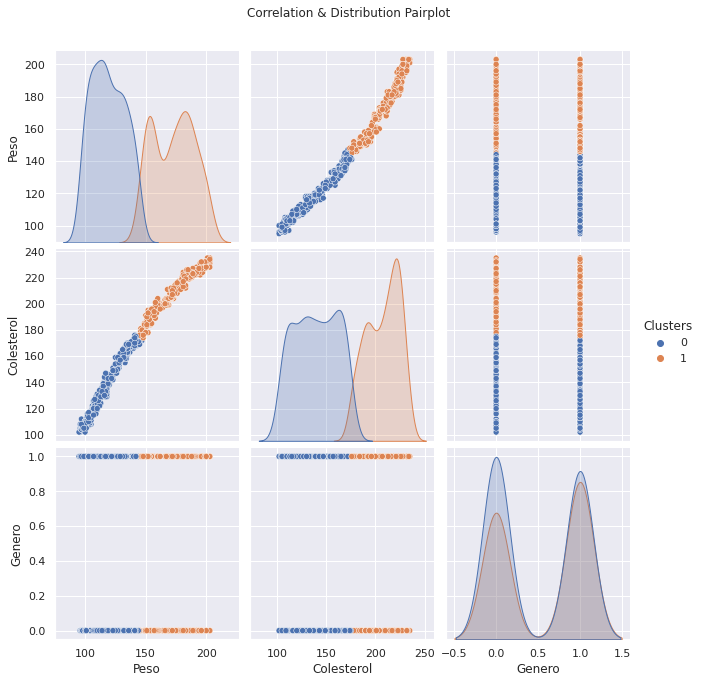

In [83]:
plt.figure(figsize = (15, 6))
sns.pairplot(data_with_clusters, hue = "Clusters", height = 3)
plt.suptitle("Correlation & Distribution Pairplot", y=1.05)
plt.show()

# **DEFININDO O TOTAL DE AGRUPAMENTO COM K = 4**

In [84]:
# Conforme enunciado foi definido 2 para K
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

In [85]:
# Aqui está o resultado do valor dos centróides:
kmeans.cluster_centers_

array([[152.09322034, 185.90677966,   0.44067797],
       [106.85      , 119.53571429,   0.54285714],
       [184.31818182, 218.91558442,   0.59090909],
       [127.72592593, 154.38518519,   0.45925926]])

In [86]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 3, 3, 2, 0, 1, 2, 2, 0, 2, 0, 1, 3, 2, 0, 1, 1, 3, 1, 0,
       2, 3, 0, 2, 0, 2, 2, 1, 1, 3, 1, 0, 2, 0, 2, 0, 3, 1, 2, 1, 0, 2,
       2, 3, 2, 3, 3, 0, 0, 1, 2, 1, 0, 1, 1, 2, 3, 1, 0, 1, 0, 2, 3, 1,
       0, 1, 2, 3, 3, 3, 3, 1, 2, 0, 3, 2, 0, 3, 3, 0, 1, 3, 0, 0, 1, 3,
       3, 0, 1, 2, 0, 0, 0, 3, 3, 1, 0, 0, 1, 2, 0, 3, 2, 2, 0, 3, 0, 2,
       3, 2, 3, 0, 2, 0, 3, 3, 3, 3, 2, 0, 1, 2, 2, 0, 2, 0, 1, 3, 2, 0,
       2, 1, 3, 1, 0, 2, 3, 0, 2, 0, 2, 2, 1, 2, 3, 1, 0, 2, 0, 2, 0, 3,
       1, 2, 1, 3, 2, 2, 3, 2, 3, 3, 0, 3, 1, 2, 1, 0, 1, 1, 2, 3, 1, 0,
       1, 0, 2, 3, 1, 0, 1, 2, 3, 3, 3, 3, 1, 2, 0, 3, 2, 0, 3, 3, 0, 2,
       3, 0, 3, 1, 1, 3, 0, 1, 2, 0, 0, 0, 3, 3, 1, 0, 0, 1, 2, 0, 3, 2,
       2, 0, 3, 0, 2, 3, 2, 3, 0, 2, 0, 3, 3, 1, 3, 2, 0, 1, 2, 2, 0, 2,
       0, 1, 3, 2, 0, 2, 1, 3, 1, 0, 2, 3, 0, 2, 0, 2, 2, 1, 2, 3, 1, 0,
       2, 0, 2, 0, 3, 2, 2, 1, 3, 2, 2, 3, 2, 3, 3, 0, 3, 1, 2, 1, 0, 1,
       1, 2, 3, 1, 0, 1, 0, 2, 3, 1, 0, 1, 2, 3, 3,

In [87]:
# Criei a coluna 'Cluster 'com os resultados da separação dos clusters
data_with_clusters = saude_df.copy()
data_with_clusters['Clusters'] = identified_clusters

In [88]:
# Trouxe os primeiros 5 resultados com os cluster 
data_with_clusters.head()

,Peso,Colesterol,Genero,Clusters
0,102,111,1,0
1,115,135,1,0
2,115,136,1,0
3,140,167,0,3
4,130,158,1,3


In [89]:
data_with_clusters.iloc[:,0:3]

,Peso,Colesterol,Genero
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1
...,...,...,...
542,172,207,1
543,129,157,1
544,107,115,1
545,117,147,1


<Figure size 1080x432 with 0 Axes>

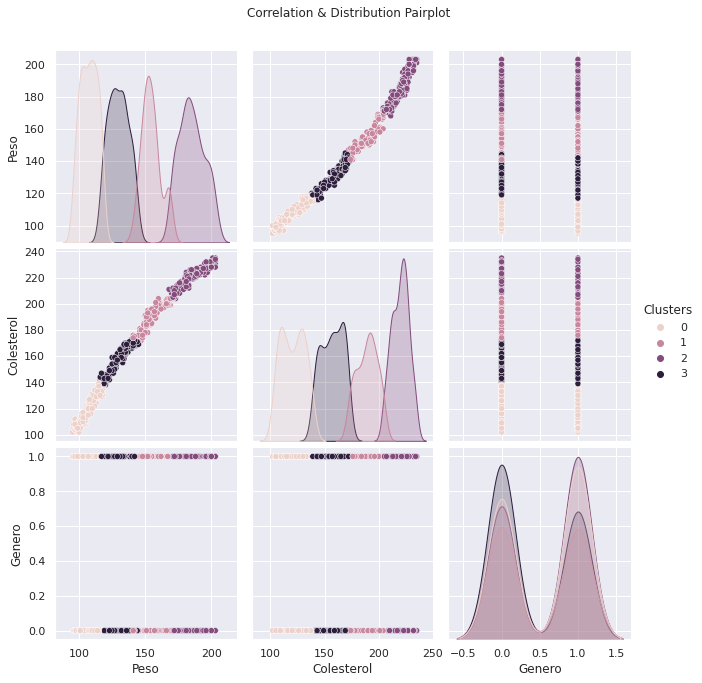

In [90]:
plt.figure(figsize = (15, 6))
sns.pairplot(data_with_clusters, hue = "Clusters", height = 3)
plt.suptitle("Correlation & Distribution Pairplot", y=1.05)
plt.show()